# A. Without API: with snscrape
To collect Tweets around particular geocode location

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import snscrape.modules.twitter as sntwitter
import itertools
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import string

# Collect Tweets from particular geocode from Google map

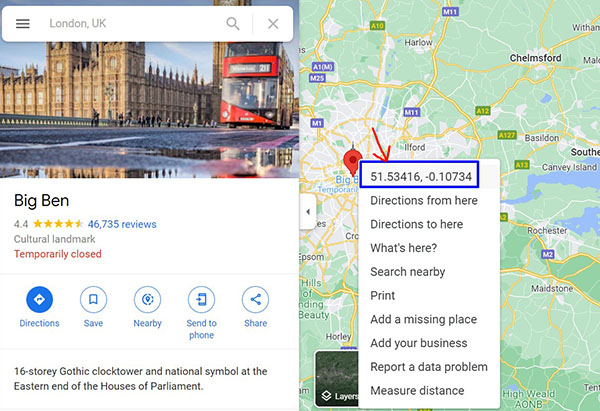

In [16]:
#Create and append to csv file and then write tweets into csv file
tweet_data = open('London_tweets_sns.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['username','tweet','hashtags']) 

#Radius around 20 km around particular geocode
max_tweets = 200
for n,tweet in enumerate(sntwitter.TwitterSearchScraper('geocode:51.53416,-0.10734,30km \
        + since:2022-07-13 until:2022-07-14 -filter:links -filter:replies').get_items()):
    if n > max_tweets:
        break
    csv.writer(tweet_data).writerow([tweet.user.username, tweet.content, tweet.hashtags])      
tweet_data.close()

In [17]:
df = pd.read_csv('London_tweets_sns.csv')
df=df.dropna(subset = ['hashtags']) #Only use tweets which contained hashtags
df.head()

,username,tweet,hashtags
2,stephengdavey,Gotta love how the Tory party is currently ele...,['TwoFacedTories']
5,IndiaWilloughby,I wonder what @PennyMordaunt ‘s brother James ...,"['NeverTrustATory', 'TransRightsAreHumanRights']"
11,ThisisWalter89,I put a copy of Lindsey C Vickers' The Appoint...,"['Flipside', 'BFI']"
12,WestEndCovers,"At @CursedChildLDN today, Sue Appleby (@sue_ap...",['1stcover']
14,dmjbartwilliams,How much does it take to choose one Tory MPs t...,['ToryLeadershipRace']


## Pre-processing, Cleaning

In [18]:
df.isnull().sum()

username    0
tweet       0
hashtags    0
dtype: int64

In [19]:
def cleaning(tweets_data):   
    tweets_data = str(tweets_data).lower()
    tweets_data = re.sub('\[.*?\]', '', tweets_data)
    tweets_data = re.sub('https?://\S+|www\.\S+', '', tweets_data)  
    tweets_data = re.sub('\n', '', tweets_data)
    tweets_data = re.sub('<.*?>+', '', tweets_data)
    tweets_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweets_data)
    tweets_data = re.sub('\w*\d\w*', '', tweets_data)   
    return tweets_data

def clean(tweets_data):   
    tweets_data = str(tweets_data).lower()
    tweets_data = re.sub("['']", '', tweets_data)
    return tweets_data

In [20]:
df['Cleaned_Tweets'] = df['tweet'].apply(cleaning)
df['Cleaned_Hashtags'] = df['hashtags'].apply(clean)
df.head()

,username,tweet,hashtags,Cleaned_Tweets,Cleaned_Hashtags
2,stephengdavey,Gotta love how the Tory party is currently ele...,['TwoFacedTories'],gotta love how the tory party is currently ele...,[twofacedtories]
5,IndiaWilloughby,I wonder what @PennyMordaunt ‘s brother James ...,"['NeverTrustATory', 'TransRightsAreHumanRights']",i wonder what pennymordaunt ‘s brother james t...,"[nevertrustatory, transrightsarehumanrights]"
11,ThisisWalter89,I put a copy of Lindsey C Vickers' The Appoint...,"['Flipside', 'BFI']",i put a copy of lindsey c vickers the appointm...,"[flipside, bfi]"
12,WestEndCovers,"At @CursedChildLDN today, Sue Appleby (@sue_ap...",['1stcover'],at cursedchildldn today sue appleby sueappleby...,[1stcover]
14,dmjbartwilliams,How much does it take to choose one Tory MPs t...,['ToryLeadershipRace'],how much does it take to choose one tory mps t...,[toryleadershiprace]


In [21]:
htag_Texts=df['Cleaned_Hashtags'].values
Tweets_String=str(htag_Texts)
htag_Texts_Cleaned = Tweets_String.lower()
htag_Texts_Cleaned=re.sub(r'@\w+', ' ', htag_Texts_Cleaned)
htag_Texts_Cleaned=re.sub(r'http\S+', ' ', htag_Texts_Cleaned) 
htag_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r' +', ' ', htag_Texts_Cleaned)
print(htag_Texts_Cleaned)

 twofacedtories nevertrustatory transrightsarehumanrights flipside bfi stcover toryleadershiprace pointless comedinewithme yzerplan weatherforecast pointless nickifreakygyal npqconference msmarvel adr kradr toryleadershiprace swesui getsense pointless conservativeleadershipcontest podcasts gamer youtuber streamers cod fifa vangaurd wednesdaymotivation motivationalquotes believeinyourself hic sterling retail btc eth crypto leadershipcontest irantalks sntc pennymordaunt stcover pointless sterlingischelsea cfc samfender finsburypark mycoachep toryleadershiprace crickettwitter 


In [22]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

hashtag_count = word_count(htag_Texts_Cleaned)
print(hashtag_count)

{'twofacedtories': 1, 'nevertrustatory': 1, 'transrightsarehumanrights': 1, 'flipside': 1, 'bfi': 1, 'stcover': 2, 'toryleadershiprace': 3, 'pointless': 4, 'comedinewithme': 1, 'yzerplan': 1, 'weatherforecast': 1, 'nickifreakygyal': 1, 'npqconference': 1, 'msmarvel': 1, 'adr': 1, 'kradr': 1, 'swesui': 1, 'getsense': 1, 'conservativeleadershipcontest': 1, 'podcasts': 1, 'gamer': 1, 'youtuber': 1, 'streamers': 1, 'cod': 1, 'fifa': 1, 'vangaurd': 1, 'wednesdaymotivation': 1, 'motivationalquotes': 1, 'believeinyourself': 1, 'hic': 1, 'sterling': 1, 'retail': 1, 'btc': 1, 'eth': 1, 'crypto': 1, 'leadershipcontest': 1, 'irantalks': 1, 'sntc': 1, 'pennymordaunt': 1, 'sterlingischelsea': 1, 'cfc': 1, 'samfender': 1, 'finsburypark': 1, 'mycoachep': 1, 'crickettwitter': 1}


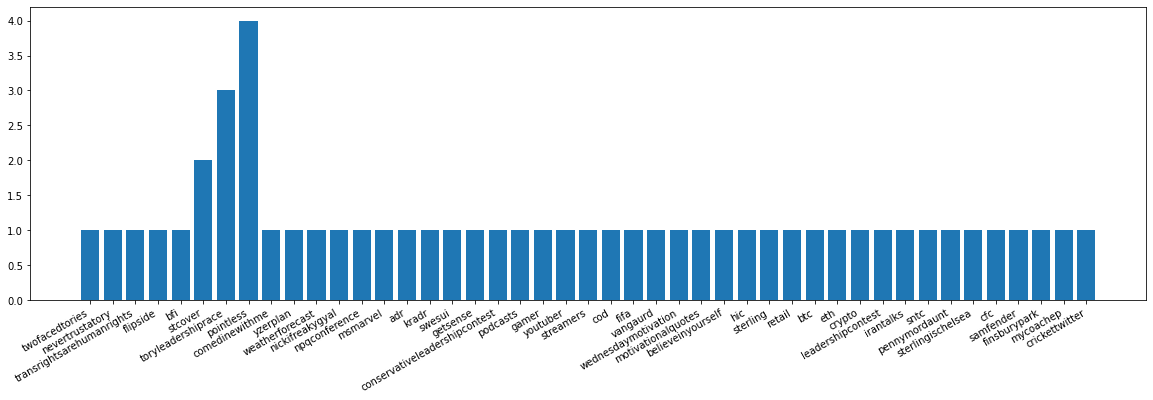

In [23]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(hashtag_count.keys(), hashtag_count.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

## 5 Most Popular hastags

In [24]:
MostPopularHashtags = sorted(hashtag_count, key=hashtag_count.get, reverse=True)[:5]
print(MostPopularHashtags)

['pointless', 'toryleadershiprace', 'stcover', 'twofacedtories', 'nevertrustatory']


## 5 Most Active Users

In [28]:
#df['user'].unique()
userlist = df['username'].value_counts()
most_active_users = userlist.head(5)
most_active_users

DavidfromBarnet    4
WestEndCovers      2
stephengdavey      1
IranIntl_En        1
Pudsum             1
Name: username, dtype: int64

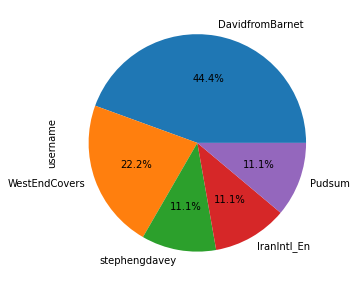

In [29]:
plot_users=most_active_users.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.savefig("Piechart",transparent=False, bbox_inches='tight',pad_inches=0.1)

In [ ]:
import numpy as np
import tweepy
import snscrape.modules.twitter as sntwitter
import csv
import string
from collections import Counter
#nltk.download()
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import re

# Twitter Developer API

In [ ]:
#https://developer.twitter.com/en/portal/dashboard

API_KEY = 'bbbbbbbbbbbbbbbbbbbbbbbbbbbbb'
API_SECRET = 'bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb'
ACCESS_TOKEN = 'bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb'
ACCESS_TOKEN_SECRET = 'bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb'

a = tweepy.OAuthHandler(API_KEY, API_SECRET)
a.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
API = tweepy.API(a)

# Twitter Trending Now

In [ ]:
#https://www.woeids.com/ # WOEID of London
woeid = 44418
trendingnow = API.get_place_trends(id = woeid)
print("Trending now in London:")
 
for trend in trendingnow:
    trends = []
    for tr in trend['trends']:
        trends.append(tr['name'])
print(trends)    

## Sentiment Analysis with nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

In [ ]:
df1 = df.drop(columns = ['username','hashtags'])
df1.head(5)

In [ ]:
#df1.value_counts()
sid.polarity_scores(df1.loc[0]['tweet'])

In [ ]:
df1.dropna(inplace=True)
blanks = []  
for i,lb,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         
            blanks.append(i)  
df1.drop(blanks, inplace=True)

In [ ]:
#df1['tweet'].value_counts()
df1['score'] = df1['tweet'].apply(lambda review: sid.polarity_scores(review))
df1['compound']  = df1['score'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment'] = df1['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')
df1.head(10)

In [ ]:
df1['tweet'][1]

In [ ]:
df1['tweet'][9]

# Topic extraction with LDA (Latent Dirichlet Allocation)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(min_df=1,max_df=0.9,stop_words='english')
dm = countv.fit_transform(df1['tweet'])
dm

In [ ]:
#LDA
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(dm)

In [ ]:
countv.get_feature_names()[1111]

In [ ]:
len(countv.get_feature_names())

In [ ]:
import random
for i in range(5):
    random_word_id = random.randint(0,1120)
    print(countv.get_feature_names()[random_word_id])

In [ ]:
for i in range(4):
    random_word_id = random.randint(0,1232)
    print(countv.get_feature_names()[random_word_id])

In [ ]:
LDA.components_

In [ ]:
len(LDA.components_[0])

In [ ]:
eachtopic = LDA.components_[0]

In [ ]:
eachtopic.argsort()

In [ ]:
eachtopic[183]

In [ ]:
# Top 5 words for this topic:
eachtopic.argsort()[-5:]

In [ ]:
word_top = eachtopic.argsort()[-5:]
for index in word_top:
    print(countv.get_feature_names()[index])

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'5 Most common discussed topic #{index}')
    print([countv.get_feature_names()[i] for i in topic.argsort()[-3:]])
    print('\n')

In [ ]:
dm

In [ ]:
dm.shape

In [ ]:
topic_res = LDA.transform(dm)

In [ ]:
topic_res.shape

In [ ]:
topic_res[0]

In [ ]:
topic_res[0].round(2)

In [ ]:
topic_res[0].argmax()

In [ ]:
df1.head()

In [ ]:
topic_res.argmax(axis=1)

In [ ]:
df1['Topic'] = topic_res.argmax(axis=1)

In [ ]:
df1.head(5)

# Topic Modeling using NMF (Non-Negative Matric Factorization)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
dm = tfidf.fit_transform(df1['tweet'])
dm

In [ ]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(dm)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'Most common discussed topic #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-3:]])
    print('\n')

In [ ]:
topic_res = nmf_model.transform(dm)
topic_res.argmax(axis=1)
df1['Topic'] = topic_res.argmax(axis=1)
df1.head(10)